In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
import spacy
nlp= spacy.load('en_core_web_sm')
nltk.download("all")
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [2]:
df=pd.read_csv("/content/amazonreviews.tsv" , sep="\t")

In [3]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
df.shape

(10000, 2)

In [5]:
df.isnull().sum()

,0
label,0
review,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
 df["review"] = df["review"].str.lower()


In [8]:
df.head()

,label,review
0,pos,stuning even for the non-gamer: this sound tra...
1,pos,the best soundtrack ever to anything.: i'm rea...
2,pos,amazing!: this soundtrack is my favorite music...
3,pos,excellent soundtrack: i truly like this soundt...
4,pos,"remember, pull your jaw off the floor after he..."


In [9]:
df["review"] = df["review"].fillna('').apply(lambda x: re.sub(r'[^a-z\s]', '', x))

In [10]:
df["review"]

,review
0,stuning even for the nongamer this sound track...
1,the best soundtrack ever to anything im readin...
2,amazing this soundtrack is my favorite music o...
3,excellent soundtrack i truly like this soundtr...
4,remember pull your jaw off the floor after hea...
...,...
9995,a revelation of life in small town america in ...
9996,great biography of a very interesting journali...
9997,interesting subject poor presentation youd be ...
9998,dont buy the box looked used and it is obvious...


In [11]:
def clean_text(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [12]:
df.head()

,label,review
0,pos,stuning even for the nongamer this sound track...
1,pos,the best soundtrack ever to anything im readin...
2,pos,amazing this soundtrack is my favorite music o...
3,pos,excellent soundtrack i truly like this soundtr...
4,pos,remember pull your jaw off the floor after hea...


In [13]:
df['clean_review'] = df['review'].apply(clean_text)

In [14]:
df.head()

,label,review,clean_review
0,pos,stuning even for the nongamer this sound track...,stuning even nongamer sound track beautiful pa...
1,pos,the best soundtrack ever to anything im readin...,best soundtrack ever anything im reading lot r...
2,pos,amazing this soundtrack is my favorite music o...,amazing soundtrack favorite music time hands i...
3,pos,excellent soundtrack i truly like this soundtr...,excellent soundtrack truly like soundtrack enj...
4,pos,remember pull your jaw off the floor after hea...,remember pull jaw floor hearing youve played g...


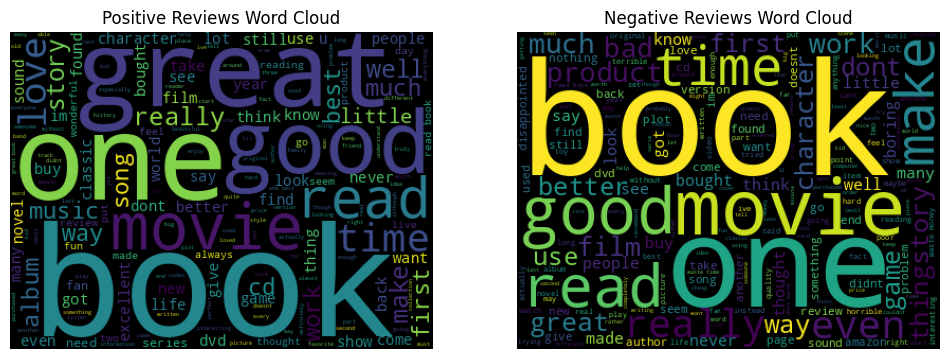

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews by sentiment
pos_text = " ".join(df[df['label'] == 'pos']['clean_review'])
neg_text = " ".join(df[df['label'] == 'neg']['clean_review'])

plt.figure(figsize=(12, 6))

# Positive reviews
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=300).generate(pos_text))
plt.title("Positive Reviews Word Cloud")
plt.axis('off')

# Negative reviews
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=300).generate(neg_text))
plt.title("Negative Reviews Word Cloud")
plt.axis('off')
plt.show()

In [16]:
df['target'] = df['label'].map({'pos': 1, 'neg': 0})
df.dropna(subset=['target'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [17]:
features= df['clean_review']
target= df['target']



In [18]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000,)
(2000,)
(8000,)
(2000,)


In [20]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)


In [21]:
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

In [22]:
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [23]:
model = LogisticRegression(solver='liblinear', random_state=42)


In [24]:
model.fit(x_train_tfidf, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [25]:
df['target'] = df['label'].map({'pos': 1, 'neg': 0})
df.dropna(subset=['target'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [26]:
features= df['clean_review']
target= df['target']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [28]:
model.fit(x_train_tfidf, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [29]:
y_pred = model.predict(x_test_tfidf)


In [30]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [31]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



In [32]:
accuracy

0.854

In [33]:
f1

0.8553022794846382

In [34]:
print(classification_report(y_test, y_pred, target_names=['Negative (0)', 'Positive (1)']))


              precision    recall  f1-score   support

Negative (0)       0.85      0.85      0.85       991
Positive (1)       0.86      0.86      0.86      1009

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

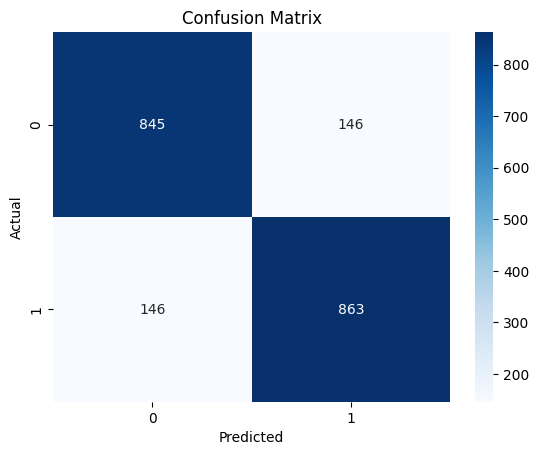

In [36]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
